<a href="https://colab.research.google.com/github/saktheeswaranswan/central-limit-theorem-animated-monk-tutorial/blob/main/central_limit_theorem_demo_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AttributeError: ignored

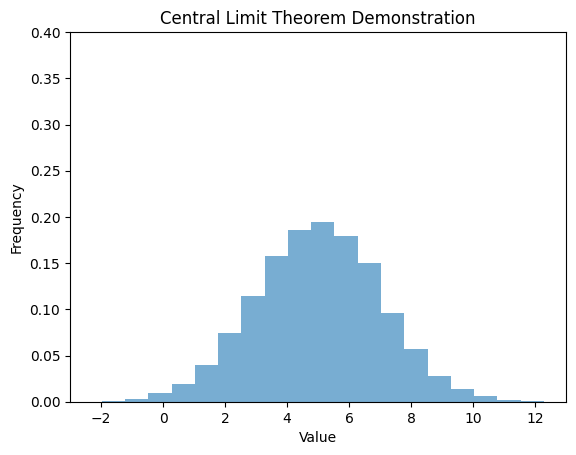

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter

# Parameters for the original distribution
original_mean = 5
original_std = 2

# Number of samples for the original distribution
num_samples = 10000

# Number of samples to sum for each approximation step
samples_per_step = 10

# Number of approximation steps
num_steps = 100

# Create the original distribution
original_distribution = np.random.normal(original_mean, original_std, num_samples)

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Initialize the plot elements
hist, bins, _ = ax.hist(original_distribution, bins=20, density=True, alpha=0.6)
line, = ax.plot([], [], 'r', lw=2)

# Set the axis limits
ax.set_xlim(original_mean - 4 * original_std, original_mean + 4 * original_std)
ax.set_ylim(0, 0.4)

# Title and labels
ax.set_title('Central Limit Theorem Demonstration')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Animation update function
def update(frame):
    ax.collections.clear()
    sample_means = []

    for _ in range(samples_per_step):
        # Randomly sample from the original distribution
        sample = np.random.choice(original_distribution, size=frame + 1)
        sample_means.append(np.mean(sample))

    # Update histogram and line plot
    hist, _ = np.histogram(sample_means, bins=bins, density=True)
    hist = hist * (bins[1] - bins[0])
    line.set_data((bins[:-1] + bins[1:]) / 2, hist)
    ax.hist(sample_means, bins=bins, density=True, alpha=0.6)
    ax.draw_artist(ax.patch)
    ax.draw_artist(line)

    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=num_steps, blit=True)

# Set up the writer for creating the animation
writer = FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)

# Save the animation to an mp4 file
ani.save('central_limit_theorem_animation.mp4', writer=writer)

# Show the animation
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


AttributeError: ignored

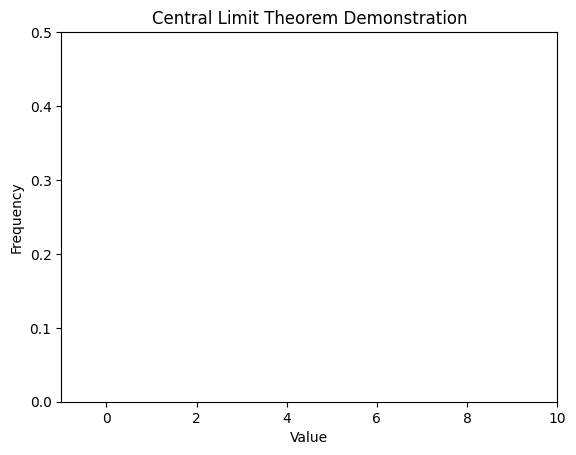

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter

# Parameters for the animation
num_samples_per_step = 50
num_steps = 100
original_mean = 5

# Distribution equation (example: y = x**2)
def custom_distribution(x):
    return x**2

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Initialize the plot elements
hist, bins, _ = ax.hist([], bins=20, density=True, alpha=0.6)
line, = ax.plot([], [], 'r', lw=2)

# Set the axis limits
ax.set_xlim(-1, 10)
ax.set_ylim(0, 0.5)

# Title and labels
ax.set_title('Central Limit Theorem Demonstration')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Animation update function
def update(frame):
    ax.collections.clear()
    sample_means = []

    for _ in range(num_samples_per_step):
        # Generate samples from the custom distribution equation
        samples = custom_distribution(np.random.uniform(0, 10, frame + 1))
        sample_means.append(np.mean(samples))

    # Update histogram and line plot
    hist, _ = np.histogram(sample_means, bins=bins, density=True)
    hist = hist * (bins[1] - bins[0])
    line.set_data((bins[:-1] + bins[1:]) / 2, hist)
    ax.hist(sample_means, bins=bins, density=True, alpha=0.6)
    ax.draw_artist(ax.patch)
    ax.draw_artist(line)

    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=num_steps, blit=True)

# Set up the writer for creating the animation
writer = FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)

# Save the animation to an mp4 file
ani.save('central_limit_theorem_animation.mp4', writer=writer)

# Show the animation
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:1740: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:1740: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


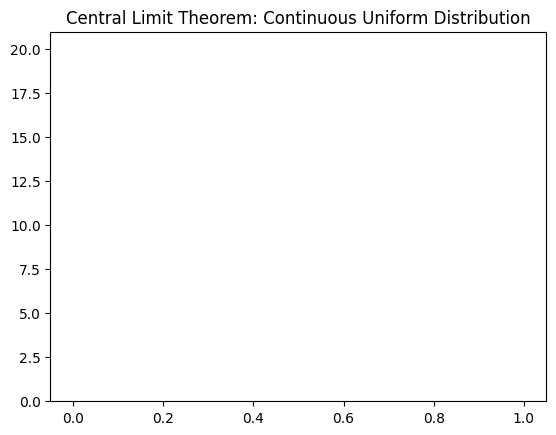

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter

# Parameters for the animation
num_samples_per_step = 50
num_steps = 100
original_mean = 5

# List of distribution equations
distribution_equations = [
    lambda n: np.random.binomial(n, 0.5, n),
    lambda n: np.random.randint(1, 7, n),
    lambda n: np.random.poisson(lam=3, size=n),
    lambda n: np.random.normal(loc=original_mean, scale=2, size=n),
    lambda n: np.random.uniform(0, 10, n),
    lambda n: np.random.exponential(scale=2, size=n),
]

distribution_names = [
    'Binomial',
    'Discrete Uniform',
    'Poisson',
    'Normal',
    'Continuous Uniform',
    'Exponential',
]

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Set the axis limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 1)

# Title and labels
ax.set_title('Central Limit Theorem Demonstration')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Initialize the plot elements
hist, bins, _ = ax.hist([], bins=20, density=True, alpha=0.6)
line, = ax.plot([], [], 'r', lw=2)

# Animation update function
def update(frame):
    ax.cla()  # Clear axis
    sample_means = []

    for _ in range(num_samples_per_step):
        # Generate samples from the current distribution equation
        samples = distribution_equations[frame](frame + 1)
        sample_means.append(np.mean(samples))

    # Update histogram and line plot
    hist, _ = np.histogram(sample_means, bins=bins, density=True)
    hist = hist * (bins[1] - bins[0])
    line.set_data((bins[:-1] + bins[1:]) / 2, hist)
    ax.hist(sample_means, bins=bins, density=True, alpha=0.6)
    ax.set_title(f'Central Limit Theorem: {distribution_names[frame]} Distribution')

    return line,

# Create animations for each distribution
animations = []
for i in range(len(distribution_equations)):
    ani = FuncAnimation(fig, update, frames=i, blit=True)
    animations.append(ani)

# Set up the writer for creating the animations
writer = FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)

# Save each animation to an mp4 file
for i, ani in enumerate(animations):
    filename = f'{distribution_names[i].lower()}_animation.mp4'
    ani.save(filename, writer=writer)

# Show the animations
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter

# Parameters for the animation
num_samples_per_step = 50
num_steps = 100
original_mean = 5

# List of distribution equations
distribution_equations = [
    lambda n: np.random.binomial(n, 0.5, n),
    lambda n: np.random.randint(1, 7, n),
    lambda n: np.random.poisson(lam=3, size=n),
    lambda n: np.random.normal(loc=original_mean, scale=2, size=n),
    lambda n: np.random.uniform(0, 10, n),
    lambda n: np.random.exponential(scale=2, size=n),
]

distribution_names = [
    'Binomial',
    'Discrete Uniform',
    'Poisson',
    'Normal',
    'Continuous Uniform',
    'Exponential',
]

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Initialize the plot elements
hist, bins, _ = ax.hist([], bins=20, density=True, alpha=0.6)
line, = ax.plot([], [], 'r', lw=2)

# Set the axis limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 1)

# Title and labels
ax.set_title('Central Limit Theorem Demonstration')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Animation update function
def update(frame):
    ax.collections.clear()
    sample_means = []

    for _ in range(num_samples_per_step):
        # Generate samples from the current distribution equation
        samples = distribution_equations[frame](frame + 1)
        sample_means.append(np.mean(samples))

    # Update histogram and line plot
    hist, _ = np.histogram(sample_means, bins=bins, density=True)
    hist = hist * (bins[1] - bins[0])
    line.set_data((bins[:-1] + bins[1:]) / 2, hist)
    ax.hist(sample_means, bins=bins, density=True, alpha=0.6)
    ax.draw_artist(ax.patch)
    ax.draw_artist(line)

    return line,

# Create animations for each distribution
animations = []
for i in range(len(distribution_equations)):
    ani = FuncAnimation(fig, update, frames=num_steps, blit=True)
    animations.append(ani)

# Set up the writer for creating the animations
writer = FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)

# Save each animation to an mp4 file
for i, ani in enumerate(animations):
    filename = f'{distribution_names[i].lower()}_animation.mp4'
    ani.save(filename, writer=writer)

# Show the animations
plt.show()


AttributeError: ignored

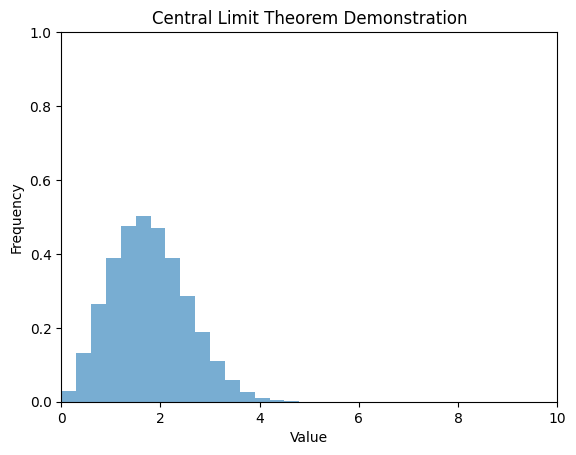

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
from scipy.stats import weibull_min

# Parameters for the Weibull distribution
shape = 2.5
scale = 2

# Number of samples for the Weibull distribution
num_samples = 10000000

# Number of samples to sum for each approximation step
samples_per_step = 10

# Number of approximation steps
num_steps = 100

# Generate the Weibull distribution using explicit equation
original_distribution = np.random.weibull(shape, num_samples) * scale

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Initialize the plot elements
hist, bins, _ = ax.hist(original_distribution, bins=20, density=True, alpha=0.6)
line, = ax.plot([], [], 'r', lw=2)

# Set the axis limits
ax.set_xlim(0, 10)  # Adjust the limits based on the distribution
ax.set_ylim(0, 1)

# Title and labels
ax.set_title('Central Limit Theorem Demonstration')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Animation update function
def update(frame):
    ax.collections.clear()
    sample_means = []

    for _ in range(samples_per_step):
        # Randomly sample from the original distribution
        sample = np.random.choice(original_distribution, size=frame + 1)
        sample_means.append(np.mean(sample))

    # Update histogram and line plot
    hist, _ = np.histogram(sample_means, bins=bins, density=True)
    hist = hist * (bins[1] - bins[0])
    line.set_data((bins[:-1] + bins[1:]) / 2, hist)
    ax.hist(sample_means, bins=bins, density=True, alpha=0.6)
    ax.draw_artist(ax.patch)
    ax.draw_artist(line)

    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=num_steps, blit=True)

# Set up the writer for creating the animation
writer = FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)

# Save the animation to an mp4 file
ani.save('central_limit_theorem_animation.mp4', writer=writer)

# Show the animation
plt.show()


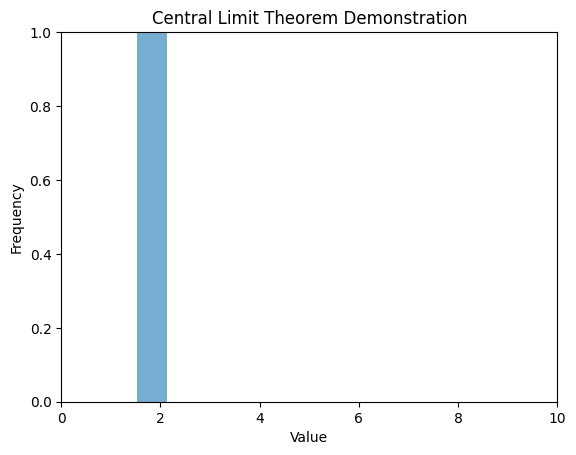

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter

# Parameters for the Weibull distribution
shape = 2.5
scale = 2

# Number of samples for the Weibull distribution
num_samples = 10000000

# Number of samples to sum for each approximation step
samples_per_step = 10

# Number of approximation steps
num_steps = 100

# Generate the Weibull distribution using explicit equation
original_distribution = np.random.weibull(shape, num_samples) * scale

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Initialize the plot elements
hist, bins, _ = ax.hist(original_distribution, bins=20, density=True, alpha=0.6)
line, = ax.plot([], [], 'r', lw=2)

# Set the axis limits
ax.set_xlim(0, 10)  # Adjust the limits based on the distribution
ax.set_ylim(0, 1)

# Title and labels
ax.set_title('Central Limit Theorem Demonstration')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Animation update function
def update(frame):
    ax.clear()
    sample_means = []

    for _ in range(samples_per_step):
        # Randomly sample from the original distribution
        sample = np.random.choice(original_distribution, size=frame + 1)
        sample_means.append(np.mean(sample))

    # Update histogram and line plot
    hist, _ = np.histogram(sample_means, bins=bins, density=True)
    hist = hist * (bins[1] - bins[0])
    line.set_data((bins[:-1] + bins[1:]) / 2, hist)
    ax.hist(sample_means, bins=bins, density=True, alpha=0.6)

    ax.set_xlim(0, 10)  # Adjust the limits based on the distribution
    ax.set_ylim(0, 1)

    ax.set_title('Central Limit Theorem Demonstration')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=num_steps, blit=True)

# Set up the writer for creating the animation
writer = FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)

# Save the animation to an mp4 file
ani.save('central_limit_theorem_animation.mp4', writer=writer)

# Show the animation
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter

# Parameters for the animation
num_samples_per_step = 50
num_steps = 100
original_mean = 5

# List of distribution equations
distribution_equations = [
    lambda n: np.random.binomial(n, 0.5, n),
    lambda n: np.random.randint(1, 7, n),
    lambda n: np.random.poisson(lam=3, size=n),
    lambda n: np.random.normal(loc=original_mean, scale=2, size=n),
    lambda n: np.random.uniform(0, 10, n),
    lambda n: np.random.exponential(scale=2, size=n),
]

distribution_names = [
    'Binomial',
    'Discrete Uniform',
    'Poisson',
    'Normal',
    'Continuous Uniform',
    'Exponential',
]

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Set the axis limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 1)

# Title and labels
ax.set_title('Central Limit Theorem Demonstration')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Initialize the plot elements
hist, bins, _ = ax.hist([], bins=20, density=True, alpha=0.6)
line, = ax.plot([], [], 'r', lw=2)

# Animation update function
def update(frame):
    sample_means = []

    # Use modulo to wrap the index within the valid range
    distribution_index = frame % len(distribution_equations)

    for _ in range(num_samples_per_step):
        samples = distribution_equations[distribution_index](frame + 1)
        sample_means.append(np.mean(samples))

    hist, _ = np.histogram(sample_means, bins=bins, density=True)
    hist = hist * (bins[1] - bins[0])
    line.set_data((bins[:-1] + bins[1:]) / 2, hist)
    ax.hist(sample_means, bins=bins, density=True, alpha=0.6)
    ax.set_title(f'Central Limit Theorem: {distribution_names[distribution_index]} Distribution')

    return line,

# Create animations for each distribution
animations = []
for i in range(len(distribution_equations)):
    ani = FuncAnimation(fig, update, frames=range(num_steps), blit=True)
    animations.append(ani)

# Set up the writer for creating the animations
writer = FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)

# Save each animation to an mp4 file
for i, ani in enumerate(animations):
    filename = f'{distribution_names[i].lower()}_animation.mp4'
    ani.save(filename, writer=writer)

# Show the animations
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
